In [1]:
import sys
import math
import numpy as np
import cv2

In [2]:
def show_img_gray(gray):
    '''Matplotlibで画像表示(グレースケール)'''
    import matplotlib.pyplot as plt
    plt.imshow(gray, cmap="gray")
    plt.show()

In [3]:
def show_img_color(bgr):
    '''Matplotlibで画像表示(カラー)'''
    import matplotlib.pyplot as plt
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.show()

In [4]:
def apply_affine(img, warp_mat):
    '''アフィン変換を適用して画像表示（カラー画像）'''
    h, w, _ = img.shape #カラー画像
    applied = cv2.warpAffine(img, warp_mat, (h, w))
    show_img_color(applied)

In [5]:
def padding(img, pad_size):
    '''パディングを行う（カラー画像）'''
    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]
    b_padded = np.pad(b, [pad_size, pad_size], mode='constant')
    g_padded = np.pad(g, [pad_size, pad_size], mode='constant')
    r_padded = np.pad(r, [pad_size, pad_size], mode='constant')
    return np.dstack([b_padded, g_padded, r_padded])

In [6]:
#imread ではできないが、VideoCapture は http で読める。
cap = cv2.VideoCapture("http://www.lenna.org/lena_std.tif") 
if( cap.isOpened() ) :
    _, lenna = cap.read()
else:
    print("画像が読み込めません")
    sys.exit()

In [7]:
# オリジナル画像
show_img_color(lenna)
h, w, ch = lenna.shape

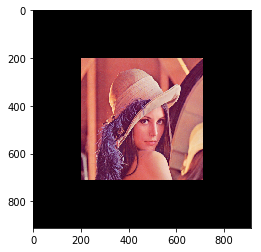

In [8]:
#パディングを行う
lenna = padding(lenna, 200)
show_img_color(lenna)

アフィン変換
\begin{equation*}
 \left(
    \begin{array}{ccc}
      1+p_1 & p_3 & p_5 \\
      p_2 & 1+p_4 & p_6
    \end{array}
  \right)
   \left(
    \begin{array}{c}
      x \\
      y \\
      1
    \end{array}
  \right)
\end{equation*}

[[1. 0. 0.]
 [0. 1. 0.]]


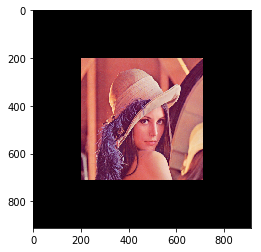

In [9]:
# 恒等変換
affine1 = np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float)
print(affine1)
apply_affine(lenna, affine1)

[[2. 0. 0.]
 [0. 1. 0.]]


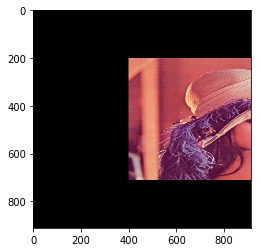

In [10]:
# X方向に拡大
affine2 = np.array([[2, 0, 0], [0, 1, 0]], dtype=np.float)
print(affine2)
apply_affine(lenna, affine2)

[[1.  0.  0. ]
 [0.  0.5 0. ]]


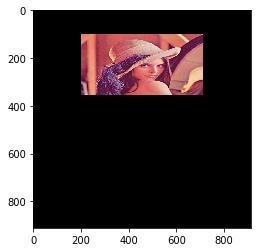

In [11]:
# Y方向に縮小
affine3 = np.array([[1, 0, 0], [0, 0.5, 0]], dtype=np.float)
print(affine3)
apply_affine(lenna, affine3)

[[  1.   0. 200.]
 [  0.   1.   0.]]


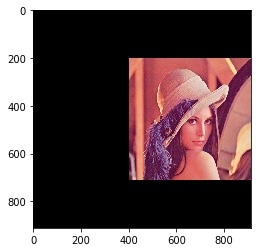

In [12]:
# X方向に平行移動
affine4 = np.array([[1, 0, 200], [0, 1, 0]], dtype=np.float)
print(affine4)
apply_affine(lenna, affine4)

[[ 0.70738827 -0.70682518  0.        ]
 [ 0.70682518  0.70738827  0.        ]]


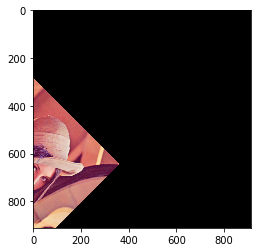

In [13]:
# 45°回転 (OpenCVの座標系なので左上が原点となり、左手系)
angle = 45.0 / 180.0 * 3.14
affine4 = np.array([[math.cos(angle), -math.sin(angle), 0], [math.sin(angle), math.cos(angle), 0]], dtype=np.float)
print(affine4)
apply_affine(lenna, affine4)

[[1.  0.5 0. ]
 [0.  1.  0. ]]


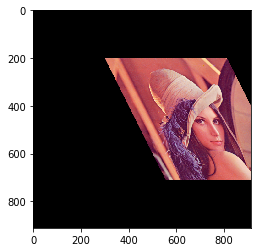

In [14]:
# shearing (剪断)
affine5 = np.array([[1, 0.5, 0], [0, 1, 0]], dtype=np.float)
print(affine5)
apply_affine(lenna, affine5)